# Jakes Fading Simulation

In [190]:
%run -i jakes.py

# Distribution of Doppler shifts

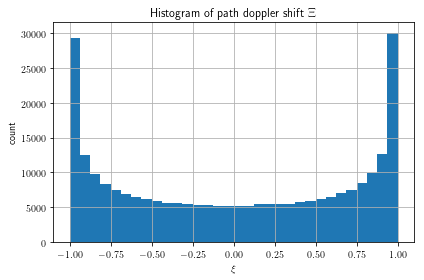

In [191]:
NN_bin = 32
jakes_fading(
    NN_sym = 0,
    NN_pth = NN_bin * 8192,     # Number of doppler shifts
)

fig, axs = plt.subplots()
axs.set_title(r"Histogram of path doppler shift $\Xi$")
axs.set_xlabel(r"$\xi$")
axs.set_ylabel(r"count")
axs.hist(xi_l,bins = NN_bin)

fig.tight_layout()
fig.savefig("./plots/doppler_shifts.png")

# Fading Envelope

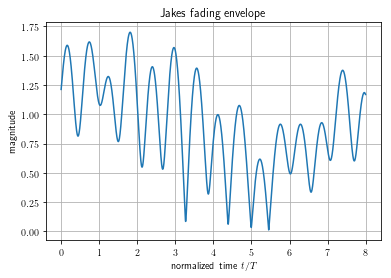

In [192]:
jakes_fading(
    NN_sym =    8, # number of symbols
    NN_sps =  256, # number of samples per symbol
    NN_pth =    8, # number of paths
    FF_dop =    1, # maximum doppler shift (Hz)
    FF_car =    0, # carrier frequency (Hz)
    FF_sym =    1, # symbol rate (baud)
)

fig, axs = plt.subplots()
axs.set_title(r"Jakes fading envelope")
axs.set_xlabel(r"normalized time $t/T$")
axs.set_ylabel(r"magnitude")
axs.plot(tt_n/TT_sym,np.abs(xx_n))
fig.savefig("./plots/fading_envelope.png")

# Doppler Power Spectrum

Still working on scaling and centering spectrum properly.

Welch periodogram properties:
frequency spacing:     0.015625 Hz
Number of frequencies: 262144
nperseg:               262144.0


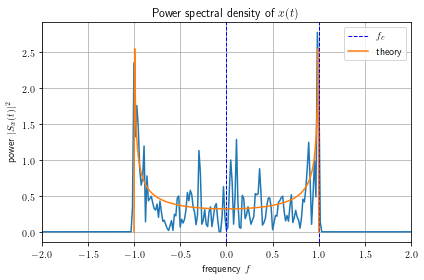

In [193]:
jakes_fading(
    NN_sym =  512, # number of symbols
    NN_sps = 1024, # number of samples per symbol
    NN_pth =  256, # number of paths
    FF_dop =    1, # maximum doppler shift (Hz)
    FF_car =    0, # carrier frequency (Hz)
    FF_sym =    4  # symbol rate (baud)
)

# Welch Spectrum
nperseg = NN_sam/2 # frequency range [-NN_sps/2,NN_sps/2]
ff, Sx = signal.welch(xx_n,
                      fs = FF_sam,
                      return_onesided = False,
                      nperseg = nperseg)

k = np.arange(ff.size) # frequency index
ff_k = ff[np.argsort(ff)]
Sx_k = Sx[np.argsort(ff)]


fig, axs = plt.subplots()
axs.set_title(r"Power spectral density of $x(t)$")
axs.set_xlabel(r"frequency $f$")
axs.set_ylabel(r"power $|S_x(t)|^2$")
axs.plot(ff_k,Sx_k)
axs.axvline(FF_car + FF_dop,linestyle = "--",linewidth=1,color="blue")
axs.axvline(FF_car,label="$f_{c}$",linestyle = "--",linewidth=1,color="blue")

# Plot theoretical doppler spectrum
def Sx_theory(f,f_dop = 1):
    func = lambda x: 1/(np.pi*f_dop*np.sqrt(1-(x/f_dop)**2))
    return np.piecewise(f,[np.abs(f)<f_dop],[func,0])
eps = np.finfo(np.float32).eps
f = np.linspace(-(FF_car+FF_dop)/FF_sym-eps,(FF_car+FF_dop)/FF_sym+eps,256)
axs.plot(f,FF_sym*Sx_theory((f-FF_car)*FF_sym,f_dop=FF_dop),label="theory")

axs.set_xlim(-2*(FF_car+FF_dop)/FF_sym,2*(FF_car+FF_dop)/FF_sym)

axs.legend()
fig.tight_layout()
fig.savefig("./plots/doppler_spectrum.png")

print("Welch periodogram properties:")
print("frequency spacing:     {} Hz".format(ff_k[1] - ff_k[0]))
print("Number of frequencies: {}".format(ff_k.size))
print("nperseg:               {}".format(nperseg))